In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns=["id","cycle","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8",
         "sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19"
         ,"sensor20","sensor21","sensor22","sensor23"]

In [3]:
train=pd.read_csv("C:\\Users\\LENOVO G3\\Downloads\\NASA\\train_FD001.txt",sep=" ",names=columns)
test=pd.read_csv("C:\\Users\\LENOVO G3\\Downloads\\NASA\\test_FD001.txt",sep=" ",names=columns)
test_results=pd.read_csv("C:\\Users\\LENOVO G3\\Downloads\\NASA\\RUL_FD001.txt",sep=" ",header=None)

## Training Data

In [6]:
print('Missing values in the trainset : ',train.isna().sum().sum())
print('Duplicate values in the trainset : ',train.duplicated().sum())

Missing values in the trainset :  41262
Duplicate values in the trainset :  0


### Dropping missing data

In [9]:
train.dropna(axis=1, how='all', inplace=True)

In [10]:
print('Missing values in the trainset : ',train.isna().sum().sum())
print('Duplicate values in the trainset : ',train.duplicated().sum())

Missing values in the trainset :  0
Duplicate values in the trainset :  0


## Testing Data

In [38]:
print('Missing values in the testset : ',test.isna().sum().sum())
print('Duplicate values in the testset : ',test.duplicated().sum())

Missing values in the testset :  26192
Duplicate values in the testset :  0


### Dropping missing data

In [41]:
test.dropna(axis=1, how='all', inplace=True)

In [42]:
print('Missing values in the testset : ',test.isna().sum().sum())
print('Duplicate values in the testset : ',test.duplicated().sum())

Missing values in the testset :  0
Duplicate values in the testset :  0


## Exploratory Data Analysis

In [12]:
train.describe()

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## Data visualization

In [17]:
column_names = train.columns.tolist()

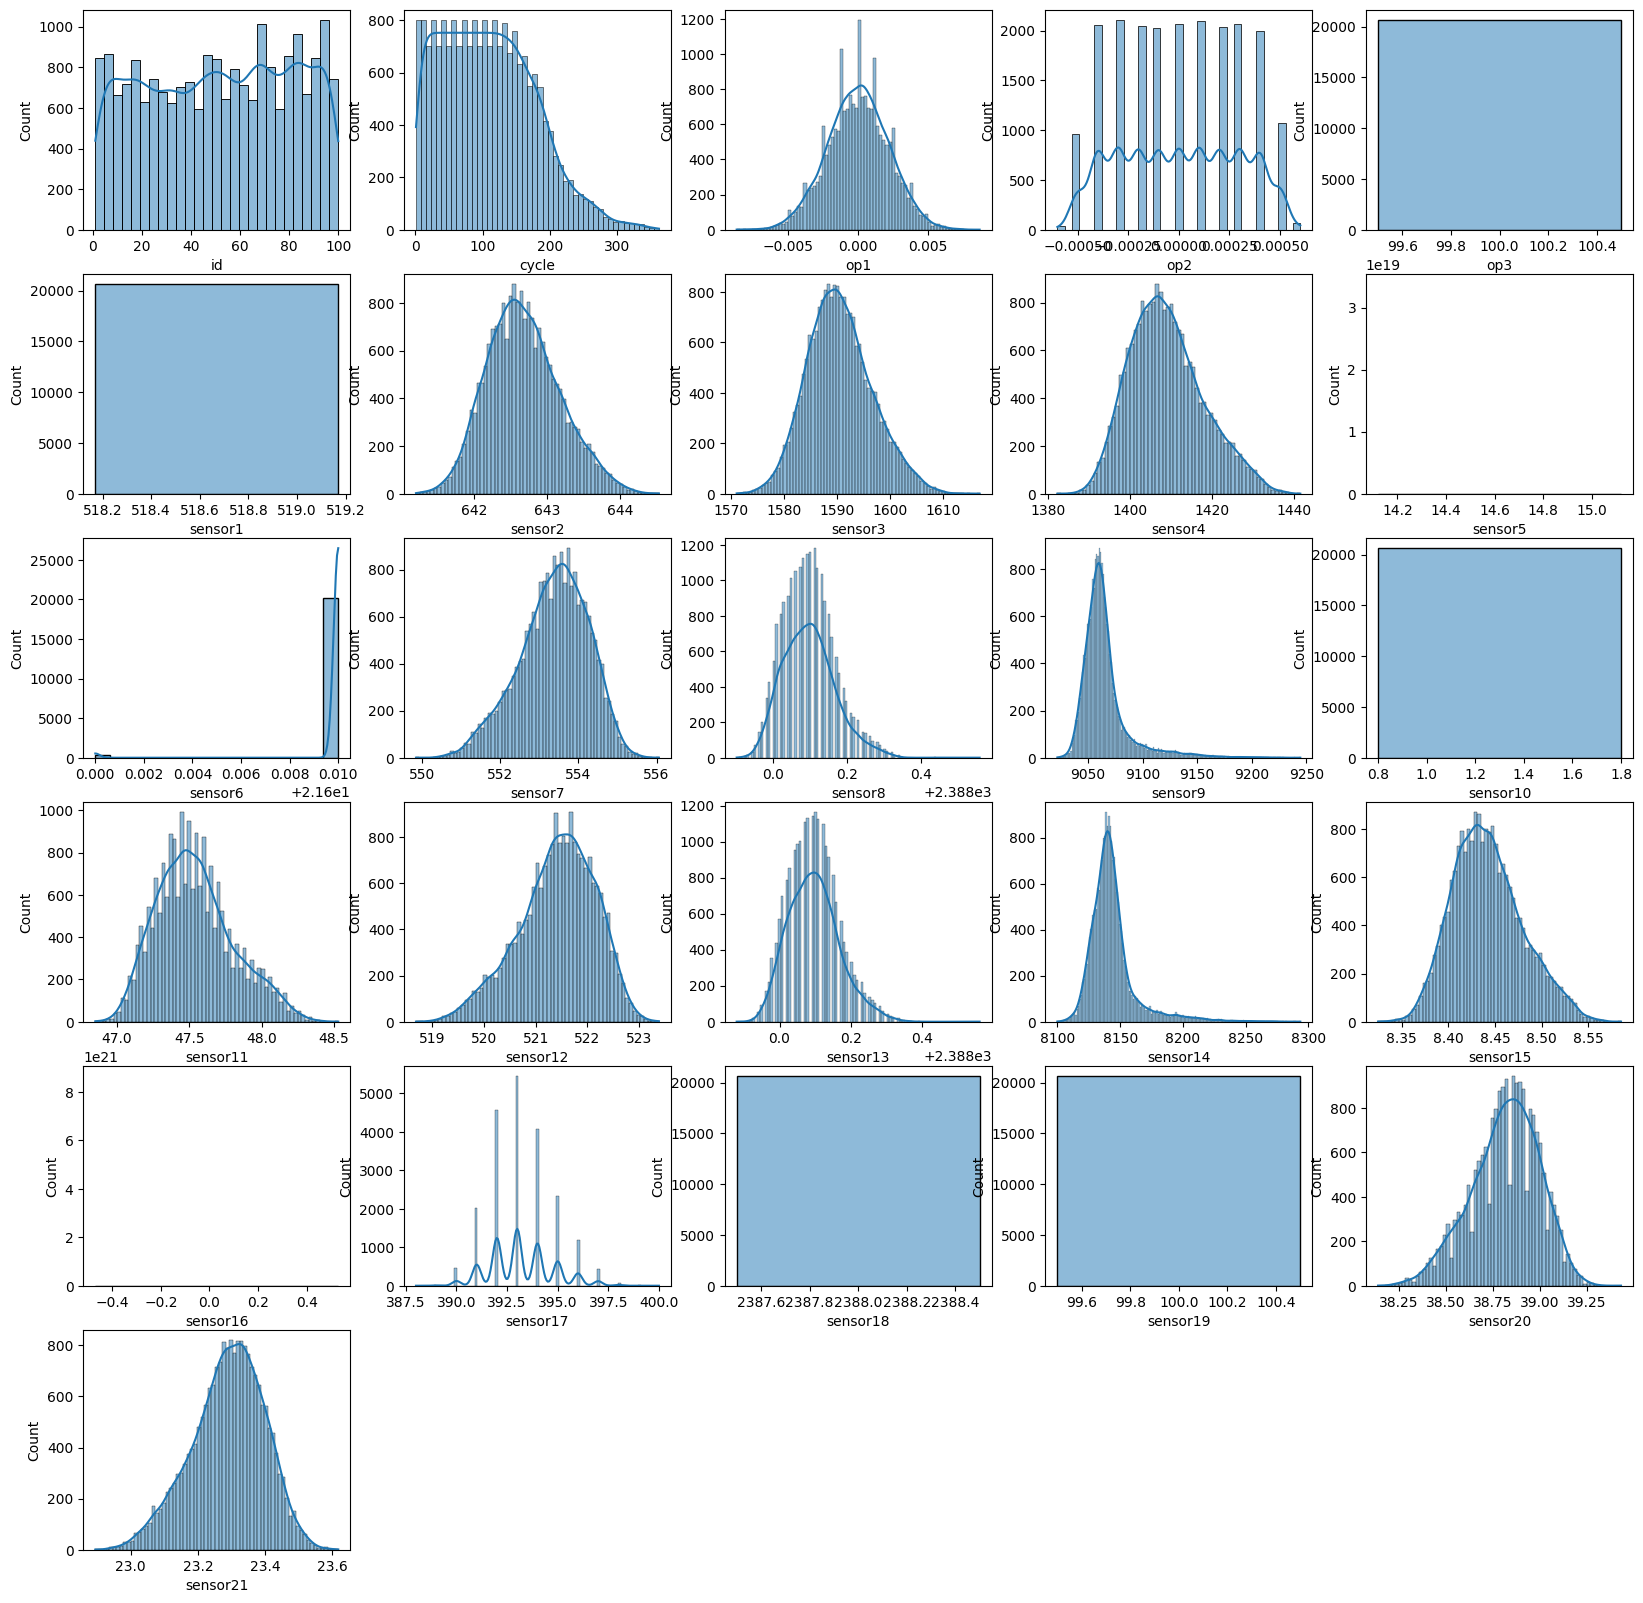

In [19]:
plt.figure(figsize=(20,20))
for i,col in enumerate(column_names,1):
    plt.subplot(6,5,i)
    sns.histplot(train[col],kde=True)

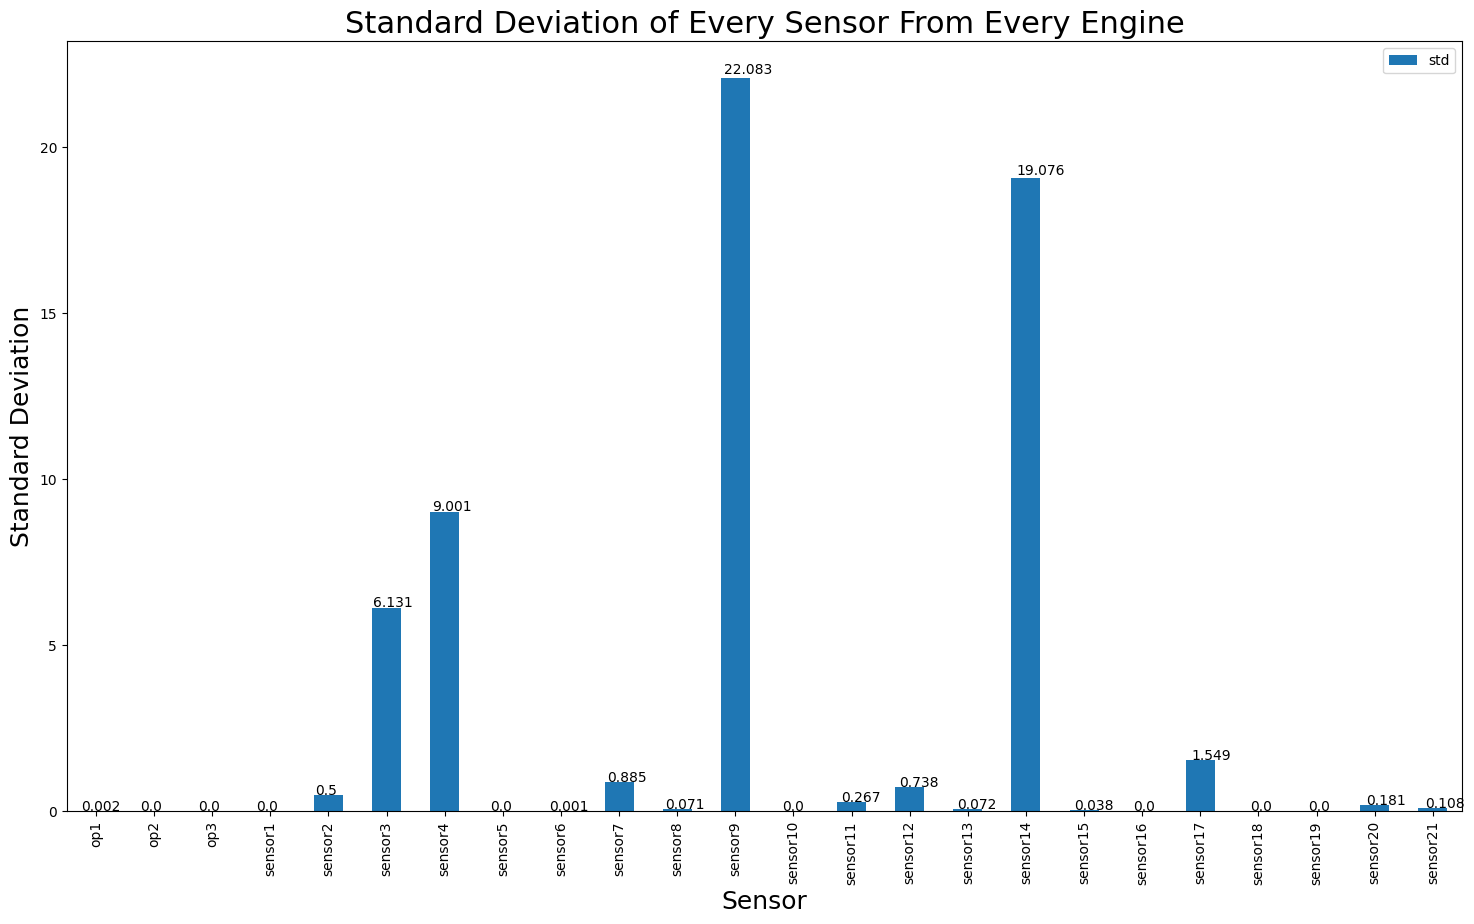

In [15]:
subset_stats = train.agg(['mean', 'std']).T[2:]
ax = subset_stats.plot.bar(figsize=(18,10), 
                           y="std")
ax.set_title("Standard Deviation of Every Sensor From Every Engine", fontsize=22)
ax.set_xlabel("Sensor", fontsize=18)
ax.set_ylabel("Standard Deviation", fontsize=18)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [26]:
from itertools import count
from matplotlib import animation
from PIL import Image
from IPython.display import HTML


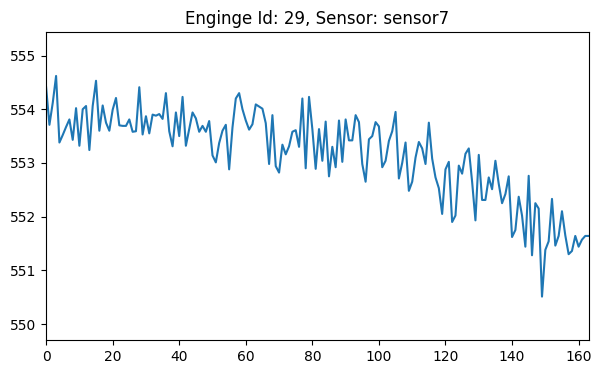

In [30]:
anim_sensor = 'sensor7'
anim_engine_id = 29

x_vals = []
y_vals = []
vals = list(train[train['id'] == anim_engine_id][anim_sensor].values)

index = count()

fig = plt.figure(figsize=(7,4))
    
def animate(i):
    ind = next(index)
    x_vals.append(ind)
    try:
        y_vals.append(vals[ind])
    except:
        y_vals.append(vals[-1])
    
    plt.cla()
    plt.title(f"Enginge Id: {anim_engine_id}, Sensor: {anim_sensor}")
    val_std = np.array(vals).std()
    plt.ylim(min(vals)-val_std, max(vals)+val_std)
    plt.xlim(0, len(vals))
    plt.plot(x_vals, y_vals)

anim = animation.FuncAnimation(fig, animate, frames=len(vals), interval=20)

# Save animation as GIF
Writer = animation.PillowWriter
anim.save('animation.gif', writer=Writer(fps=30))

# Display animation in HTML output cell
HTML('<img src="animation.gif">')


## Adding Target Column

In [43]:
test_results.columns=["rul","null"]
test_results.head()

,rul,null
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [44]:
test_results.drop(["null"],axis=1,inplace=True)
test_results['id']=test_results.index+1
test_results.head()

,rul,id
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [45]:
rul = pd.DataFrame(test.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']

In [46]:
rul.head()

,id,max
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98


In [47]:
test_results['rul_failed']=test_results['rul']+rul['max']
test_results.head()

,rul,id,rul_failed
0,112,1,143
1,98,2,147
2,69,3,195
3,82,4,188
4,91,5,189


In [48]:
test_results.drop(["rul"],axis=1,inplace=True)

In [49]:
test=test.merge(test_results,on=['id'],how='left')

In [51]:
test["remaining_cycle"]=test["rul_failed"]-test["cycle"]

In [52]:
test.sample(10)

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul_failed,remaining_cycle
10733,82,133,-0.0023,0.0003,100.0,518.67,643.16,1595.23,1413.37,14.62,...,8134.79,8.4162,0.03,395,2388,100.0,38.78,23.1927,171,38
12309,94,83,0.0004,0.0002,100.0,518.67,642.88,1588.81,1412.09,14.62,...,8137.85,8.4257,0.03,394,2388,100.0,38.82,23.2833,188,105
4398,35,131,0.0015,0.0000,100.0,518.67,643.23,1597.12,1411.91,14.62,...,8136.87,8.4261,0.03,395,2388,100.0,38.70,23.2443,209,78
10177,79,24,-0.0048,0.0002,100.0,518.67,642.55,1579.05,1403.80,14.62,...,8136.40,8.3916,0.03,392,2388,100.0,39.02,23.4058,164,140
9583,74,94,0.0009,0.0001,100.0,518.67,642.52,1595.04,1403.66,14.62,...,8140.10,8.4105,0.03,393,2388,100.0,38.74,23.3005,263,169
3074,27,13,-0.0008,0.0005,100.0,518.67,641.86,1575.32,1402.62,14.62,...,8131.92,8.3767,0.03,393,2388,100.0,38.97,23.3457,206,193
3540,30,10,0.0024,0.0002,100.0,518.67,642.69,1592.34,1407.26,14.62,...,8128.52,8.4241,0.03,393,2388,100.0,38.92,23.2420,258,248
10507,81,120,-0.0038,0.0000,100.0,518.67,643.09,1585.75,1402.27,14.62,...,8148.43,8.4556,0.03,392,2388,100.0,38.76,23.3352,221,101
5440,43,154,0.0004,-0.0001,100.0,518.67,642.86,1585.13,1407.06,14.62,...,8131.46,8.4521,0.03,393,2388,100.0,38.70,23.2727,231,77
4787,38,75,-0.0021,-0.0002,100.0,518.67,642.34,1590.93,1410.25,14.62,...,8138.37,8.4468,0.03,394,2388,100.0,38.80,23.1967,175,100


In [55]:
train['remaining_cycle'] = train.groupby(['id'])['cycle'].transform(max)-train['cycle']

In [56]:
train.sample(10)

,id,cycle,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,remaining_cycle
4963,25,84,-0.0007,0.0003,100.0,518.67,642.51,1587.35,1403.91,14.62,...,2388.15,8130.31,8.4590,0.03,392,2388,100.0,38.88,23.3614,146
7634,39,125,0.0062,0.0002,100.0,518.67,643.82,1600.98,1436.58,14.62,...,2388.27,8112.34,8.5306,0.03,397,2388,100.0,38.54,23.2056,3
1347,7,44,0.0020,0.0001,100.0,518.67,642.64,1587.50,1398.15,14.62,...,2387.98,8148.41,8.4042,0.03,392,2388,100.0,38.87,23.4205,215
2167,11,32,-0.0001,-0.0004,100.0,518.67,641.69,1580.75,1401.48,14.62,...,2388.06,8136.73,8.4134,0.03,393,2388,100.0,38.96,23.3978,208
13303,67,185,-0.0006,0.0003,100.0,518.67,643.57,1586.31,1407.38,14.62,...,2388.12,8144.58,8.4317,0.03,395,2388,100.0,38.76,23.1788,128
4909,25,30,-0.0031,-0.0000,100.0,518.67,641.61,1589.98,1405.03,14.62,...,2388.14,8128.57,8.4311,0.03,394,2388,100.0,38.97,23.2102,200
1758,9,46,0.0003,0.0002,100.0,518.67,642.02,1576.37,1403.72,14.62,...,2388.03,8143.48,8.4083,0.03,392,2388,100.0,38.85,23.4921,155
1090,5,244,0.0002,-0.0001,100.0,518.67,642.95,1591.37,1422.41,14.62,...,2388.13,8189.79,8.4810,0.03,396,2388,100.0,38.46,23.0463,25
17222,85,71,0.0016,-0.0001,100.0,518.67,642.82,1592.67,1405.49,14.62,...,2388.11,8126.68,8.4430,0.03,392,2388,100.0,38.86,23.3271,117
14072,70,80,0.0017,0.0002,100.0,518.67,642.16,1581.81,1407.59,14.62,...,2388.11,8144.07,8.4190,0.03,392,2388,100.0,38.83,23.3113,57


## Model Training

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping